In [1]:
# DNN(작은 의미의 딥러닝) 실습

In [2]:
import tensorflow

In [3]:
# 손 글씨 데이터 셋 불러오기
mnist = tensorflow.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

11493376/11490434 [==============================] - 5s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [9]:
import numpy as np

In [10]:
# numpy float 출력 옵션 변경
np.set_printoptions(formatter={'float_kind': lambda x:f"{x:0.3f}"})
np.set_printoptions(linewidth=1000)

In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [12]:
import matplotlib.pyplot as plt

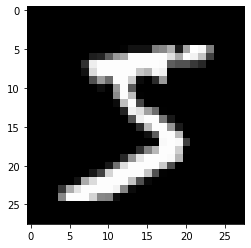

In [18]:
# 이미지 출력
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))

In [19]:
# 정규화(표준화, 축소)하기
x_train = x_train / 255.0
x_test = x_test / 255.0

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [24]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))    # 28 x 28 (2차원)이미지를 1차원으로 번형 ==> 784
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))                     # overfitting을 막기 위해 Dropout 20% 적용
model.add(Dense(10, activation='softmax'))  # 10 : 0~9 중에 하나를 맞춘다. (0~9) 각각의 확률을 0.0~1.0 사이로 리턴

In [25]:
model.summary()  # 요약 정보

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [29]:
# 모델 설정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
# 훈련
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2991 - accuracy: 0.9127
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1417 - accuracy: 0.9584
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1078 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0870 - accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0748 - accuracy: 0.9760


In [31]:
# 점수
model.evaluate(x_test, y_test)

# [0.07797571271657944, 0.9772999882698059] ==> [비용, 정확도] : 비용은 0에 가까울수록 좋음,  정확도는 1에 가까울수록 오버피팅일 가능성이 있음

313/313 [==============================] - 0s 1ms/step - loss: 0.0780 - accuracy: 0.9773


[0.07797571271657944, 0.9772999882698059]

In [ ]:
ㅁㄴㅇ